In [1]:
# In Depth: Linear Regression

%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")
import numpy as np 

/tmp/ipykernel_552875/1380054750.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


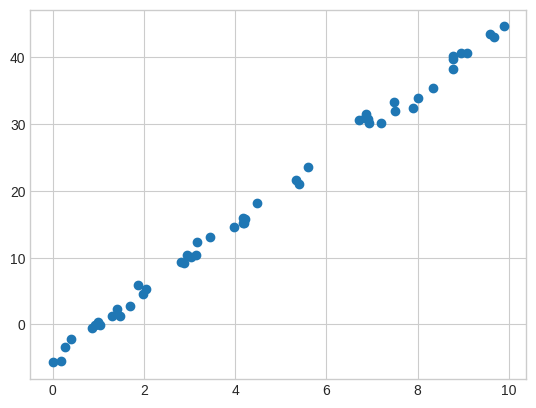

In [3]:
# Simple Linear Regression 
# y = ax + b  <- a is a slope, b is an intercept 

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 5 * x - 5 + rng.randn(50)
plt.scatter(x,y);

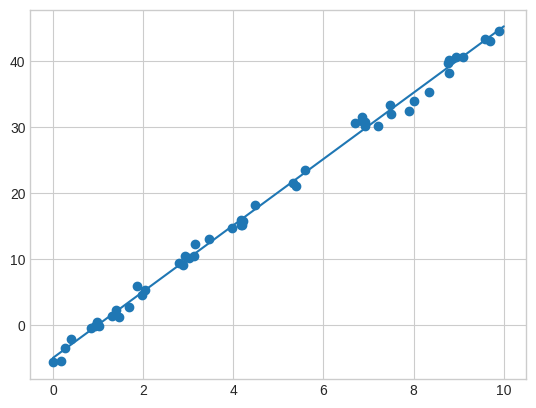

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:,np.newaxis], y)

xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

In [5]:
print("model slope: ", model.coef_[0])
print("model intercept: ", model.intercept_)


model slope:  5.027208810360694
model intercept:  -4.9985770855531975


In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100,3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

0.5000000000000091
[ 1.5 -2.   1. ]


In [7]:
# Polynomial Basis Functions 
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

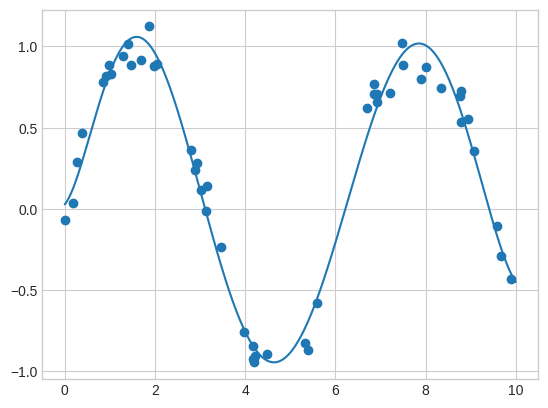

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:,np.newaxis], y)
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

(0.0, 10.0)

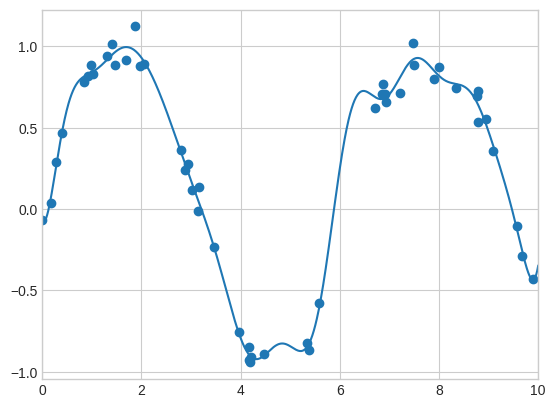

In [10]:
# Gaussian Basis Functions 

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N 
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x,y, width, axis=None):
        arg = (x-y) / width 
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range 
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor*(self.centers_[1]-self.centers_[0])
        return self 
    
    def transform(self, X):
        return self._gauss_basis(X[:,:,np.newaxis], self.centers_, 
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(
    GaussianFeatures(20),
    LinearRegression()
)

gauss_model.fit(x[:,np.newaxis], y)
yfit = gauss_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlim(0,10)

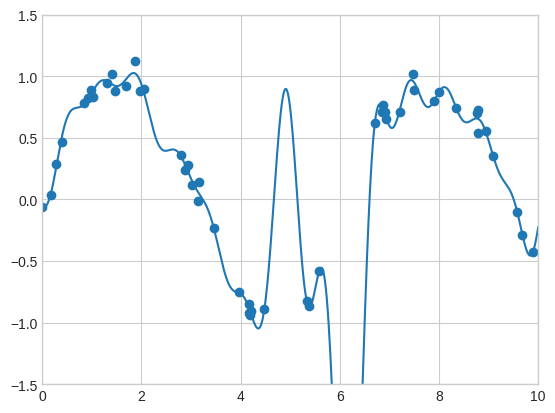

In [11]:
# Regularization 

model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:,np.newaxis],y)

plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:,np.newaxis]))

plt.xlim(0,10)
plt.ylim(-1.5, 1.5);

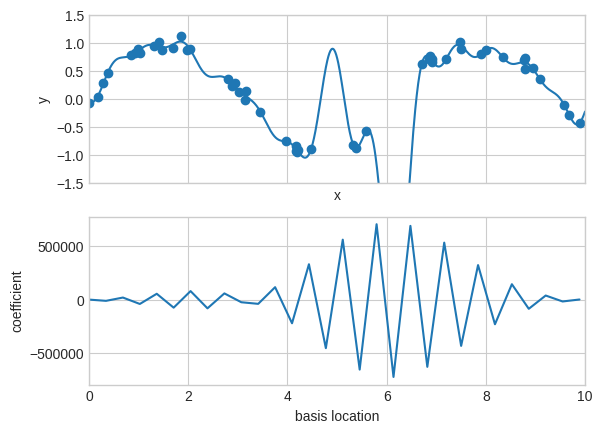

In [13]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:,np.newaxis], y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit, model.predict(xfit[:,np.newaxis]))
    ax[0].set(xlabel="x", ylabel="y", ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_, 
               model.steps[1][1].coef_)
    ax[1].set(xlabel="basis location", ylabel="coefficient", xlim=(0,10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

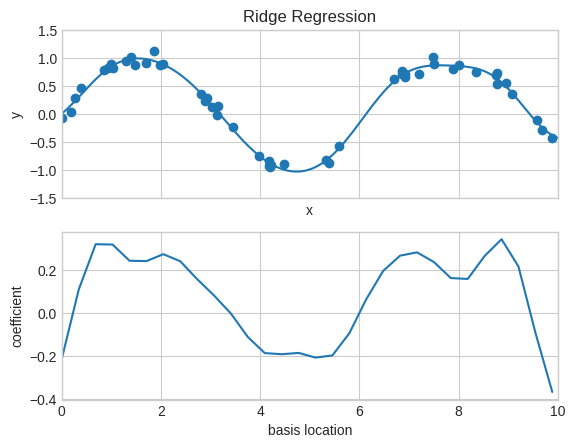

In [14]:
# установка пенальти для модели при слишком большом усложнении 
# L2 - Regularization
# обратите внимание на то что получили в этом графике 
# и то что было в предыдущем - вот как раз и результаты применения 
# регулярицизации для того чтобы избегать оверфиттинга 

from sklearn.linear_model import Ridge 
model = make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1))
basis_plot(model, title="Ridge Regression")

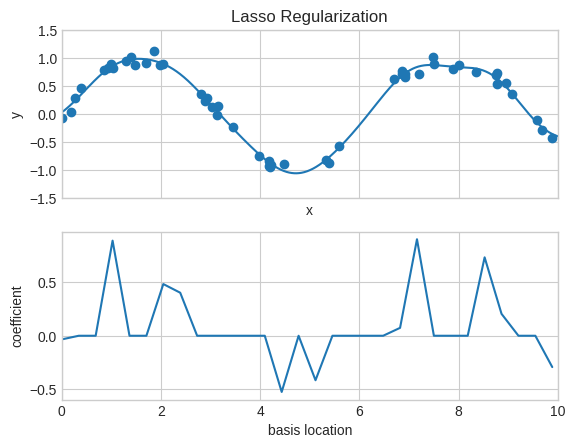

In [15]:
# еще одна регуляризация - Lasso 
from sklearn.linear_model import Lasso 
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=2000))
basis_plot(model, title="Lasso Regularization")